<a href="https://colab.research.google.com/github/Riya222-Herald/Artificial-Intelligence-and-Machine-Learning/blob/master/2329555_Riya_Pradhan_Code_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [ ]:

train_dir = '/content/drive/MyDrive/AI ML Workshops and tutorials/ai final tasks/Assignment 1/train'
val_dir = '/content/drive/MyDrive/AI ML Workshops and tutorials/ai final tasks/Assignment 1/test'
test_dir = '/content/drive/MyDrive/AI ML Workshops and tutorials/ai final tasks/Assignment 1/validation'

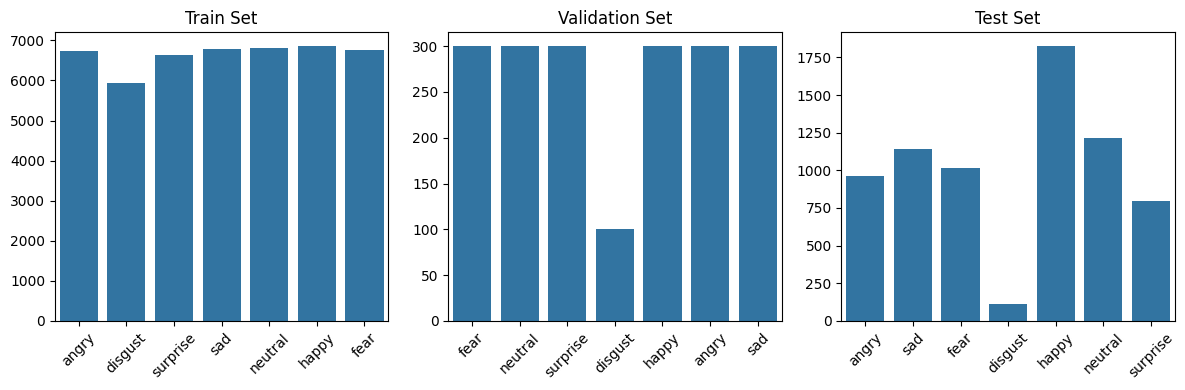

Train counts: {'angry': 6733, 'disgust': 5945, 'surprise': 6625, 'sad': 6795, 'neutral': 6800, 'happy': 6857, 'fear': 6757}
Validation counts: {'fear': 300, 'neutral': 300, 'surprise': 300, 'disgust': 100, 'happy': 300, 'angry': 300, 'sad': 300}
Test counts: {'angry': 960, 'sad': 1139, 'fear': 1018, 'disgust': 111, 'happy': 1825, 'neutral': 1216, 'surprise': 797}


In [ ]:
def count_images(directory):
    counts = {}
    for emotion in os.listdir(directory):
        emotion_dir = os.path.join(directory, emotion)
        if os.path.isdir(emotion_dir):
            counts[emotion] = len(os.listdir(emotion_dir))
    return counts

train_counts = count_images(train_dir)
val_counts = count_images(val_dir)
test_counts = count_images(test_dir)

emotion_labels = sorted(train_counts.keys())
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()))
plt.title('Train Set')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x=list(val_counts.keys()), y=list(val_counts.values()))
plt.title('Validation Set')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()))
plt.title('Test Set')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("Train counts:", train_counts)
print("Validation counts:", val_counts)
print("Test counts:", test_counts)

In [ ]:

classes = sorted(os.listdir(train_dir))
num_classes = len(classes)

print(f"\nNumber of classes: {num_classes}")
print(f"Class names: {classes}")


Number of classes: 7
Class names: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
import cv2

sample_img_path = os.path.join(train_dir, classes[0], os.listdir(os.path.join(train_dir, classes[0]))[0])
sample_img = cv2.imread(sample_img_path, cv2.IMREAD_GRAYSCALE)  # Assuming grayscale

height, width = sample_img.shape
print(f"\nImage resolution: {width}x{height} (Width x Height)")


Image resolution: 48x48 (Width x Height)


<ipython-input-7-d65c9589e14f>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=emotions, y=counts, palette=palette)


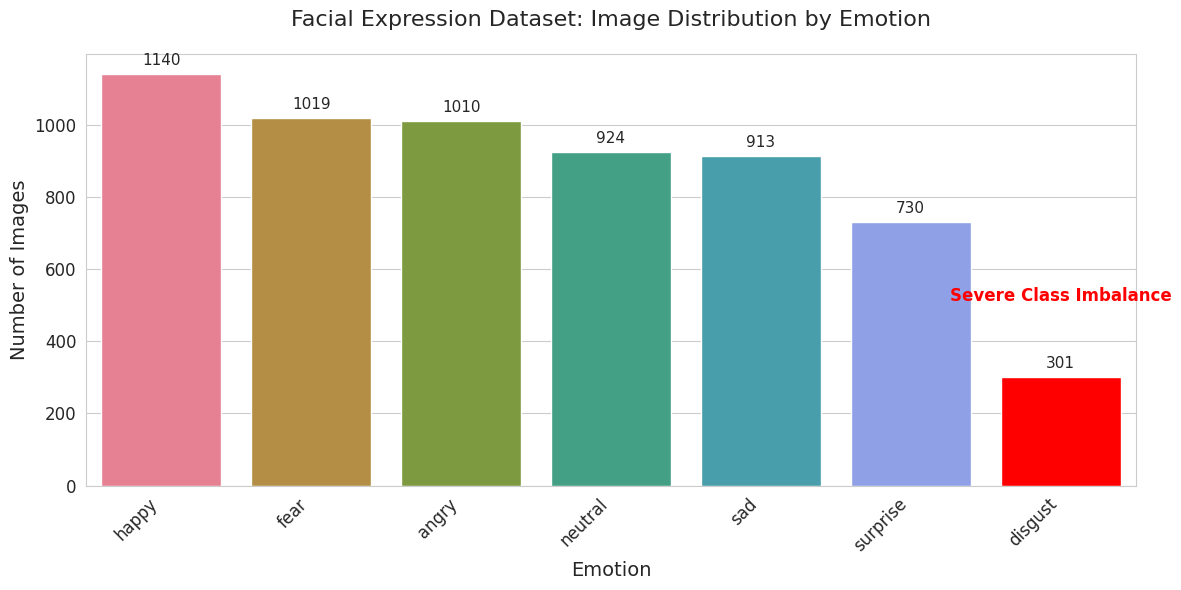

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


emotion_counts = {
    'angry': 1010,
    'disgust': 301,
    'fear': 1019,
    'happy': 1140,
    'surprise': 730,
    'sad': 913,
    'neutral': 924
}


sorted_emotions = sorted(emotion_counts.items(), key=lambda x: x[1], reverse=True)
emotions = [x[0] for x in sorted_emotions]
counts = [x[1] for x in sorted_emotions]


plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
palette = sns.color_palette("husl", len(emotions))  # Colorful palette

ax = sns.barplot(x=emotions, y=counts, palette=palette)

plt.title("Facial Expression Dataset: Image Distribution by Emotion", fontsize=16, pad=20)
plt.xlabel("Emotion", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=11
    )

ax.patches[emotions.index('disgust')].set_facecolor('red')
plt.text(
    emotions.index('disgust'), counts[emotions.index('disgust')] + 200,
    "Severe Class Imbalance",
    ha='center', va='bottom', color='red', fontsize=12, weight='bold'
)

plt.tight_layout()
plt.show()

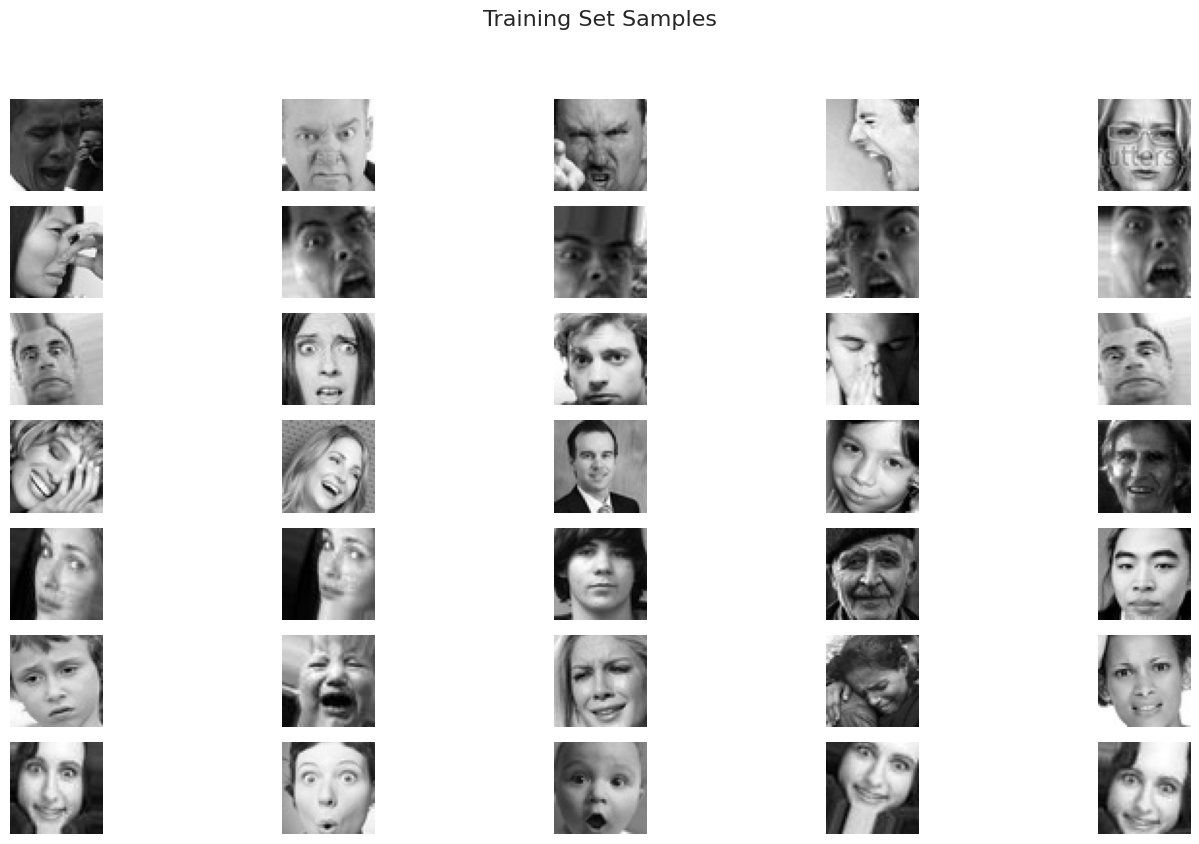

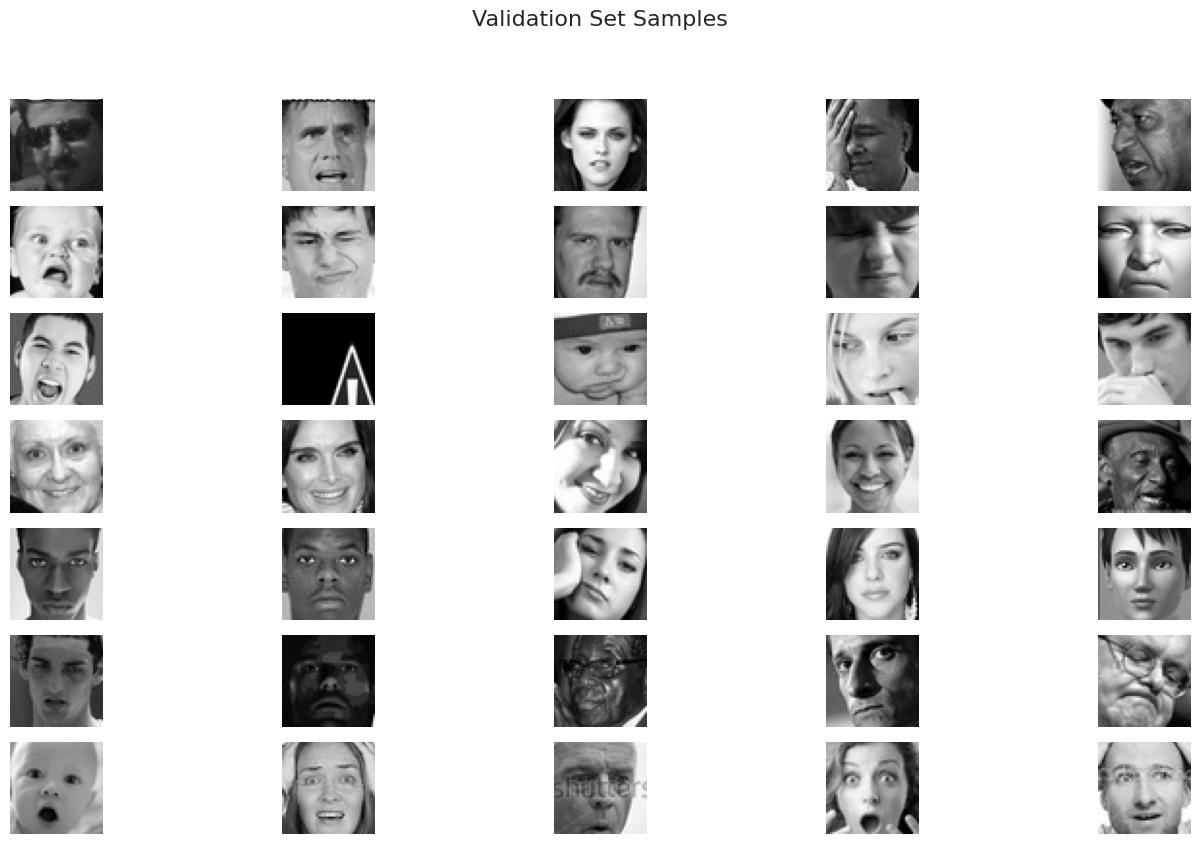

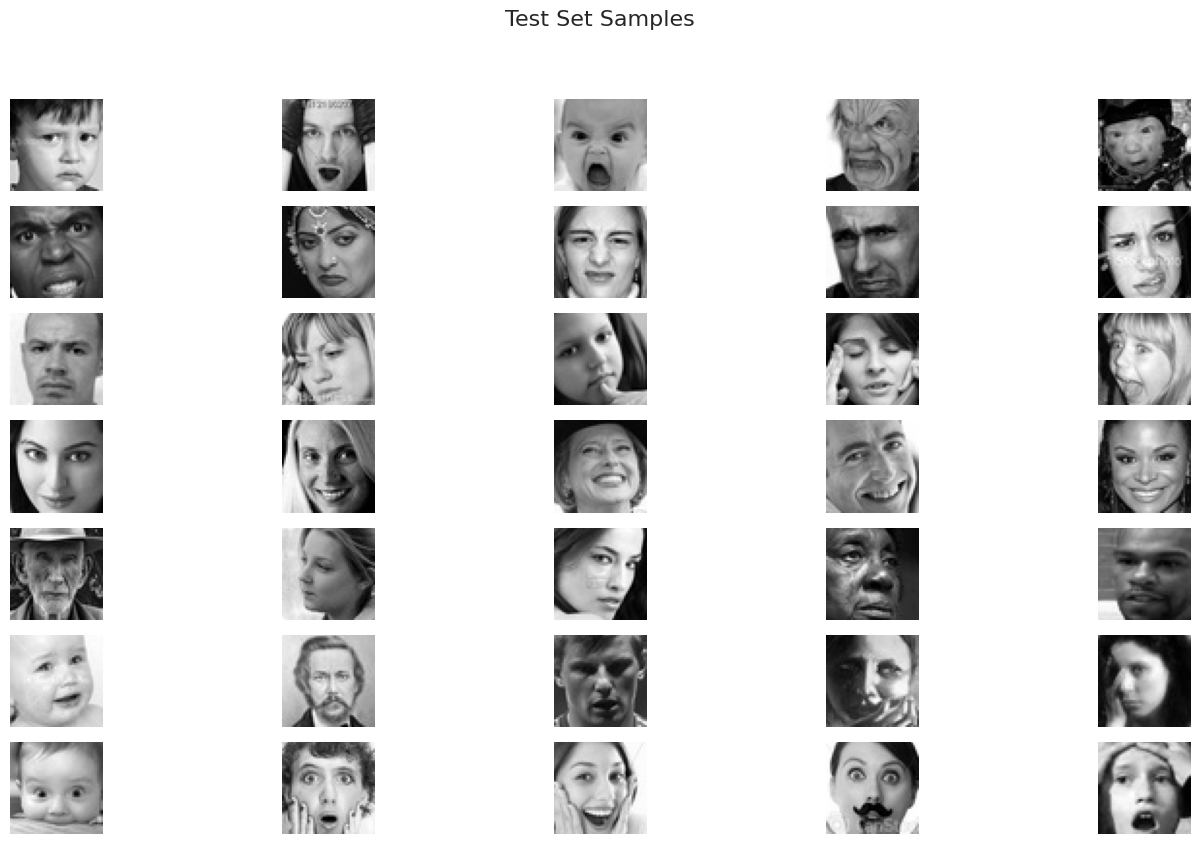

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2

def plot_samples(directory, title, num_samples=5):
    emotions = sorted([d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))])
    plt.figure(figsize=(15, 8))
    plt.suptitle(title, fontsize=16, y=1.05)

    for i, emotion in enumerate(emotions):
        emotion_dir = os.path.join(directory, emotion)
        images = os.listdir(emotion_dir)
        sampled_images = random.sample(images, min(num_samples, len(images)))

        for j, img_name in enumerate(sampled_images):
            img_path = os.path.join(emotion_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            plt.subplot(len(emotions), num_samples, i * num_samples + j + 1)
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            if j == 0:
                plt.ylabel(emotion, fontsize=12, rotation=0, ha='right', va='center')

    plt.tight_layout()
    plt.show()


plot_samples(train_dir, "Training Set Samples")
plot_samples(val_dir, "Validation Set Samples")
plot_samples(test_dir, "Test Set Samples")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## **DATA AUGMENTATION**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import numpy as np
from tqdm import tqdm


train_dir = '/content/drive/MyDrive/AI ML Workshops and tutorials/ai final tasks/Assignment 1/train'

def count_images(directory):
    counts = {}
    for emotion in os.listdir(directory):
        emotion_path = os.path.join(directory, emotion)
        if os.path.isdir(emotion_path):
            counts[emotion] = len(os.listdir(emotion_path))
    return counts

class_counts = count_images(train_dir)
max_count = max(class_counts.values())

print("Original class counts:", class_counts)
print("Target per class:", max_count)


augmentor = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


for emotion, count in class_counts.items():
    if count >= max_count:
        continue

    emotion_path = os.path.join(train_dir, emotion)
    images = os.listdir(emotion_path)
    needed = max_count - count
    print(f"\nAugmenting '{emotion}': Need {needed} more images")

    i = 0
    pbar = tqdm(total=needed)
    while i < needed:
        img_name = np.random.choice(images)
        img_path = os.path.join(emotion_path, img_name)
        try:
            img = load_img(img_path)
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)

            for batch in augmentor.flow(x, batch_size=1, save_to_dir=emotion_path,
                                        save_prefix='aug', save_format='jpg'):
                i += 1
                pbar.update(1)
                if i >= needed:
                    break
        except Exception as e:
            print(f"Skipping error in {img_path}: {e}")
    pbar.close()


updated_counts = count_images(train_dir)
print("\n Updated class counts:")
for k, v in updated_counts.items():
    print(f"{k}: {v}")


img_size = (48, 48)
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


val_dir = '/content/drive/MyDrive/AI ML Workshops and tutorials/ai final tasks/Assignment 1/validation'
test_dir = '/content/drive/MyDrive/AI ML Workshops and tutorials/ai final tasks/Assignment 1/test'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Original class counts: {'angry': 6733, 'disgust': 5945, 'surprise': 6625, 'sad': 6795, 'neutral': 6800, 'happy': 6857, 'fear': 6757}
Target per class: 6857

Augmenting 'angry': Need 124 more images


100%|██████████| 124/124 [00:20<00:00,  6.09it/s]



Augmenting 'disgust': Need 912 more images


100%|██████████| 912/912 [02:31<00:00,  6.03it/s]



Augmenting 'surprise': Need 232 more images


100%|██████████| 232/232 [02:31<00:00,  1.53it/s]



Augmenting 'sad': Need 62 more images


100%|██████████| 62/62 [00:07<00:00,  8.01it/s]



Augmenting 'neutral': Need 57 more images


100%|██████████| 57/57 [00:05<00:00, 10.37it/s]



Augmenting 'fear': Need 100 more images


100%|██████████| 100/100 [00:14<00:00,  6.75it/s]



 Updated class counts:
angry: 6815
disgust: 6348
surprise: 6767
sad: 6836
neutral: 6844
happy: 6857
fear: 6820
Found 47287 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Found 1900 images belonging to 7 classes.


Showing augmented samples from: angry


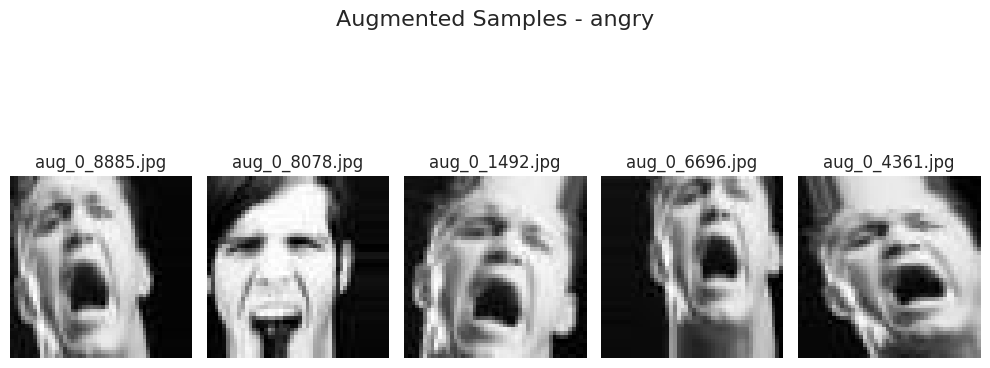

Showing augmented samples from: disgust


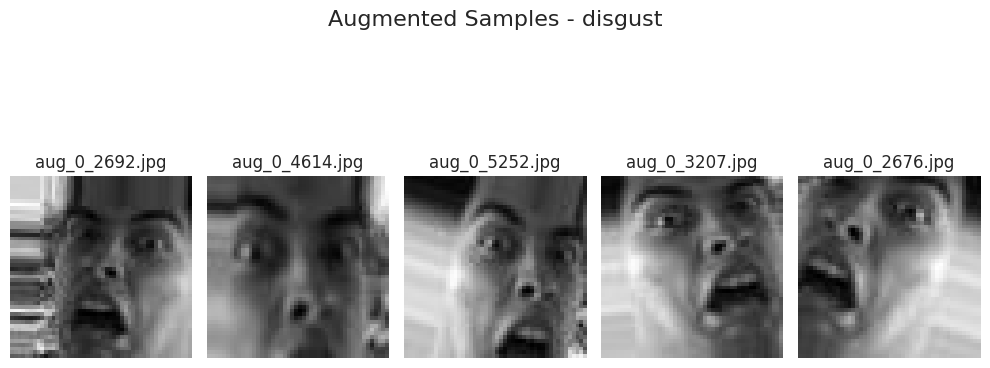

Showing augmented samples from: surprise


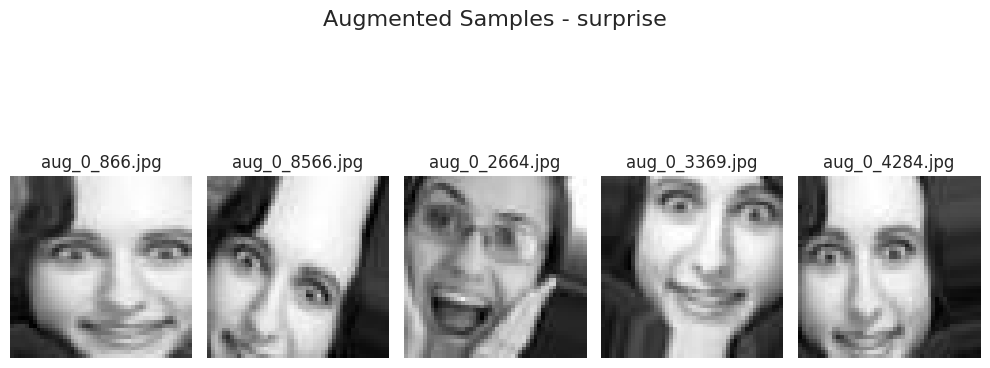

Showing augmented samples from: sad


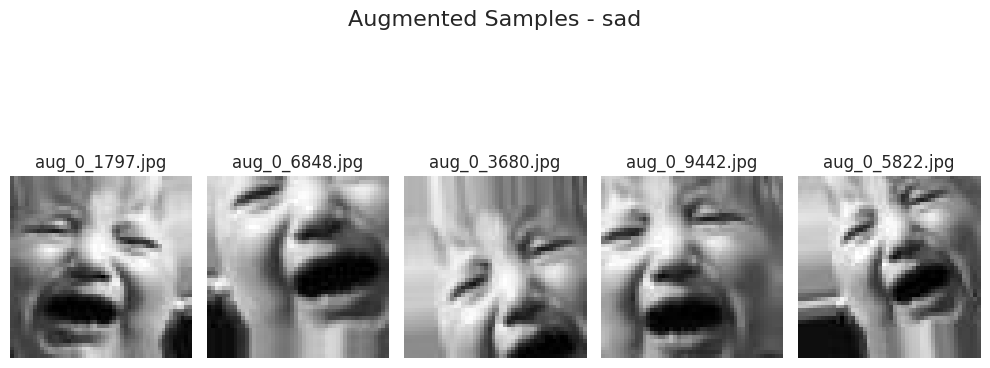

Showing augmented samples from: neutral


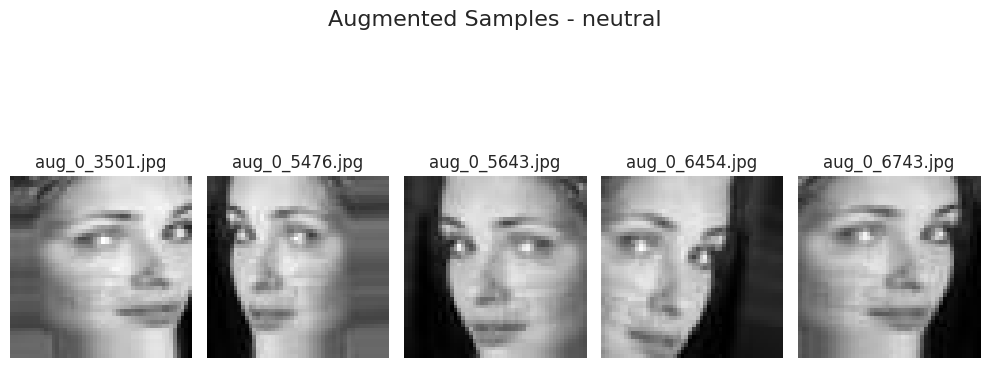

No augmented images found in 'happy'
Showing augmented samples from: fear


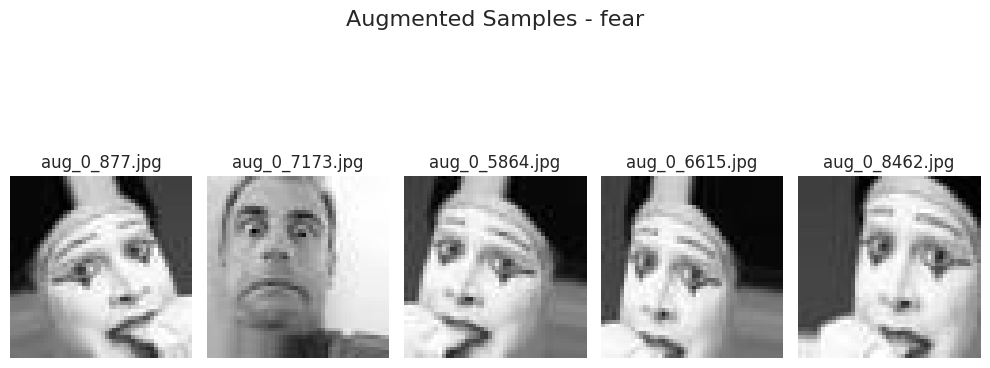

In [ ]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import os

for emotion_folder in os.listdir(train_dir):
    emotion_path = os.path.join(train_dir, emotion_folder)

    if not os.path.isdir(emotion_path):
        continue


    augmented_images = [img for img in os.listdir(emotion_path) if img.startswith('aug_')]

    if len(augmented_images) == 0:
        print(f"No augmented images found in '{emotion_folder}'")
        continue

    print(f"Showing augmented samples from: {emotion_folder}")


    plt.figure(figsize=(10, 5))
    for i in range(5):
        img_name = random.choice(augmented_images)
        img_path = os.path.join(emotion_path, img_name)
        img = Image.open(img_path)

        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(img_name)

    plt.suptitle(f"Augmented Samples - {emotion_folder}", fontsize=16)
    plt.tight_layout()
    plt.show()


## **3.1.2 Design, Train, and Evaluate a Baseline Model**

1. Model Architecture: [2]:
• Build a baseline CNN model with the following structure:
– Three Convolutional layers, each followed by pooling layers.
– Three fully connected layers (FCN)
– An output layer suitable for classification.
• Use an appropriate activation function and kernel size for each layer.
• Print and analyze the model summary.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = 7
input_shape = (48, 48, 1)

def build_baseline_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Flatten(),

        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),

        Dense(num_classes, activation='softmax')  # Output layer
    ])
    return model

baseline_model = build_baseline_model()
baseline_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 658,823 (2.51 MB)

 Trainable params: 658,823 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

2. Model Training

Removing corrupted image

In [ ]:
import os
from PIL import Image, UnidentifiedImageError

def clean_dataset(root_dir):
    for folder in os.listdir(root_dir):
        folder_path = os.path.join(root_dir, folder)
        if not os.path.isdir(folder_path):
            continue
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            try:
                with Image.open(file_path) as img:
                    img.verify()
            except (UnidentifiedImageError, OSError):
                print(f"Deleting bad file: {file_path}")
                os.remove(file_path)


clean_dataset(train_dir)
clean_dataset(val_dir)
clean_dataset(test_dir)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI ML Workshops and tutorials/ai final tasks/Assignment 1/train',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True,
    seed=42
)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI ML Workshops and tutorials/ai final tasks/Assignment 1/validation',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI ML Workshops and tutorials/ai final tasks/Assignment 1/test',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False
)

Found 47287 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Found 1900 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
import time


train_classes = train_generator.classes
class_weights = compute_class_weight('balanced',
                                   classes=np.unique(train_classes),
                                   y=train_classes)
class_weight_dict = dict(enumerate(class_weights))

print("Class weights:", class_weight_dict)


baseline_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy',
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)


callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

start_time = time.time()
baseline_history = baseline_model.fit(
    train_generator,
    epochs=8,
    validation_data=val_generator,
    callbacks=callbacks,
    class_weight=class_weight_dict
)
baseline_time = (time.time() - start_time)/60

print(f"\nTraining completed in {baseline_time:.2f} minutes")
print(f"Stopped early at epoch {len(baseline_history.history['loss'])}")

Class weights: {0: np.float64(0.9912378157425846), 1: np.float64(1.0641596903411648), 2: np.float64(0.9905111018014244), 3: np.float64(0.9851663576324506), 4: np.float64(0.9870376555063872), 5: np.float64(0.9881927610131238), 6: np.float64(0.998268910046655)}


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.3835 - loss: 1.5133 - precision: 0.8196 - recall: 0.1903

1478/1478 ━━━━━━━━━━━━━━━━━━━━ 237s 156ms/step - accuracy: 0.3836 - loss: 1.5132 - precision: 0.8196 - recall: 0.1904 - val_accuracy: 0.3183 - val_loss: 1.7325 - val_precision: 0.4409 - val_recall: 0.0491
Epoch 2/8
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.5874 - loss: 1.0558 - precision: 0.9225 - recall: 0.4192

1478/1478 ━━━━━━━━━━━━━━━━━━━━ 205s 121ms/step - accuracy: 0.5874 - loss: 1.0558 - precision: 0.9225 - recall: 0.4192 - val_accuracy: 0.4260 - val_loss: 1.5253 - val_precision: 0.7023 - val_recall: 0.1329
Epoch 3/8
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.6398 - loss: 0.9333 - precision: 0.9046 - recall: 0.4928

1478/1478 ━━━━━━━━━━━━━━━━━━━━ 179s 121ms/step - accuracy: 0.6398 - loss: 0.9333 - precision: 0.9046 - recall: 0.4928 - val_accuracy: 0.4282 - val_loss: 1.5031 - val_precision: 0.6819 - val_recall: 0.1793
Epoch 4/8
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.6746 - loss: 0.8480 - precision: 0.9059 - recall: 0.5367

1478/1478 ━━━━━━━━━━━━━━━━━━━━ 176s 119ms/step - accuracy: 0.6746 - loss: 0.8480 - precision: 0.9059 - recall: 0.5367 - val_accuracy: 0.4764 - val_loss: 1.3604 - val_precision: 0.6786 - val_recall: 0.2839
Epoch 5/8
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.6946 - loss: 0.8005 - precision: 0.9009 - recall: 0.5634

1478/1478 ━━━━━━━━━━━━━━━━━━━━ 176s 119ms/step - accuracy: 0.6946 - loss: 0.8005 - precision: 0.9009 - recall: 0.5634 - val_accuracy: 0.5161 - val_loss: 1.2965 - val_precision: 0.6999 - val_recall: 0.3327
Epoch 6/8
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.7063 - loss: 0.7696 - precision: 0.9007 - recall: 0.5779

1478/1478 ━━━━━━━━━━━━━━━━━━━━ 180s 122ms/step - accuracy: 0.7063 - loss: 0.7696 - precision: 0.9007 - recall: 0.5779 - val_accuracy: 0.5253 - val_loss: 1.2484 - val_precision: 0.7411 - val_recall: 0.3034
Epoch 7/8
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.7154 - loss: 0.7435 - precision: 0.8984 - recall: 0.5900

1478/1478 ━━━━━━━━━━━━━━━━━━━━ 173s 117ms/step - accuracy: 0.7154 - loss: 0.7435 - precision: 0.8984 - recall: 0.5900 - val_accuracy: 0.5338 - val_loss: 1.2357 - val_precision: 0.7358 - val_recall: 0.3271
Epoch 8/8
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.7223 - loss: 0.7284 - precision: 0.9001 - recall: 0.5988

1478/1478 ━━━━━━━━━━━━━━━━━━━━ 173s 117ms/step - accuracy: 0.7223 - loss: 0.7284 - precision: 0.9001 - recall: 0.5988 - val_accuracy: 0.5413 - val_loss: 1.2112 - val_precision: 0.7506 - val_recall: 0.3211

Training completed in 25.01 minutes
Stopped early at epoch 8


3. Plot training vs validation loss
python



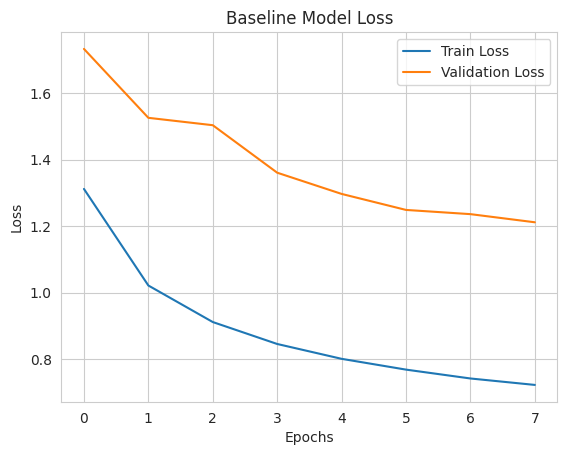

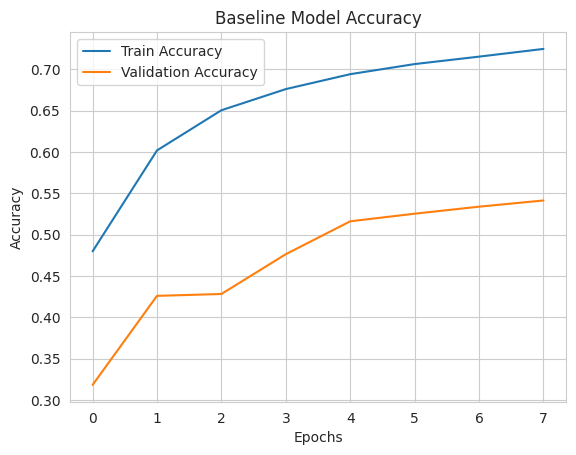

In [ ]:
import matplotlib.pyplot as plt


plt.plot(baseline_history.history['loss'], label='Train Loss')
plt.plot(baseline_history.history['val_loss'], label='Validation Loss')
plt.title('Baseline Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(baseline_history.history['accuracy'], label='Train Accuracy')
plt.plot(baseline_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Baseline Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


4. Model Evaluation

In [ ]:

test_loss, test_acc, test_precision, test_recall = baseline_model.evaluate(test_generator)
print(f"Test Results:\n"
      f"Loss: {test_loss:.4f}\n"
      f"Accuracy: {test_acc:.4f}\n"
      f"Precision: {test_precision:.4f}\n"
      f"Recall: {test_recall:.4f}")


results = baseline_model.evaluate(test_generator)
test_loss, test_acc = results[0], results[1]
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.4333 - loss: 1.4857 - precision: 0.6470 - recall: 0.2283
Test Results:
Loss: 1.3661
Accuracy: 0.4784
Precision: 0.6973
Recall: 0.2837
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.4333 - loss: 1.4857 - precision: 0.6470 - recall: 0.2283
Test Loss: 1.3661, Test Accuracy: 0.4784


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

test_generator.reset()
Y_true = test_generator.classes
Y_pred_prob = baseline_model.predict(test_generator)
Y_pred = np.argmax(Y_pred_prob, axis=1)

print(classification_report(Y_true, Y_pred, target_names=test_generator.class_indices.keys()))


60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step
              precision    recall  f1-score   support

       angry       0.42      0.51      0.46       300
     disgust       0.86      0.06      0.11       100
        fear       0.34      0.17      0.23       300
       happy       0.63      0.73      0.68       300
     neutral       0.40      0.56      0.47       300
         sad       0.37      0.41      0.39       300
    surprise       0.67      0.64      0.65       300

    accuracy                           0.48      1900
   macro avg       0.53      0.44      0.43      1900
weighted avg       0.49      0.48      0.46      1900



5. Inference and plotting predictions on sample images

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


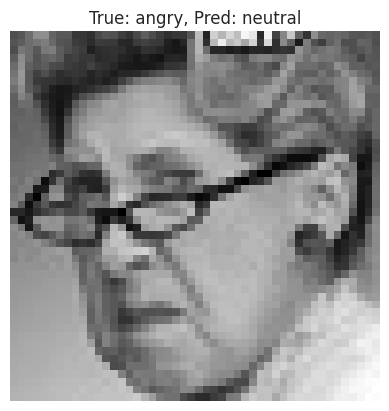

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


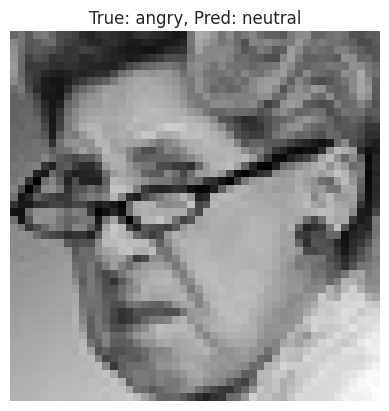

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


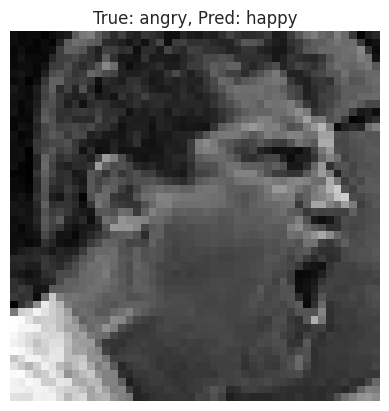

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


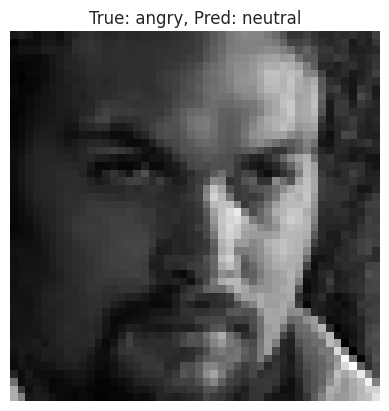

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


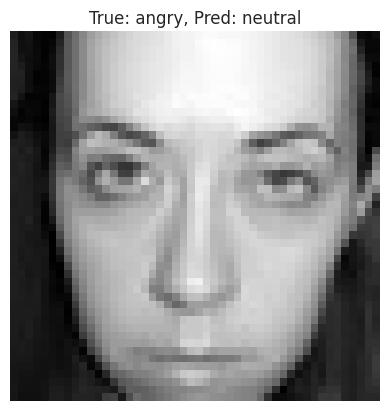

In [ ]:
import random
from PIL import Image

for _ in range(5):
    img, label = next(test_generator)
    idx = random.randint(0, len(img) - 1)
    sample_img = img[idx]
    true_label = np.argmax(label[idx])

    pred_prob = baseline_model.predict(sample_img[np.newaxis, ...])
    pred_label = np.argmax(pred_prob)

    plt.imshow(sample_img.squeeze(), cmap='gray')
    plt.title(f"True: {list(test_generator.class_indices.keys())[true_label]}, Pred: {list(test_generator.class_indices.keys())[pred_label]}")
    plt.axis('off')
    plt.show()


60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step


<Figure size 1000x800 with 0 Axes>

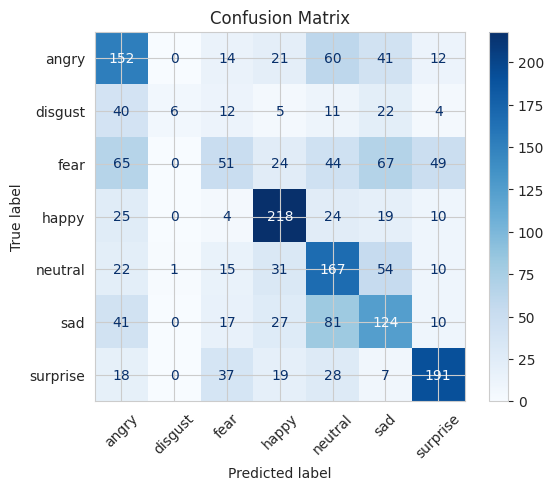

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np


test_generator.reset()
Y_true = test_generator.classes
Y_pred_prob = baseline_model.predict(test_generator)
Y_pred = np.argmax(Y_pred_prob, axis=1)


cm = confusion_matrix(Y_true, Y_pred)
class_labels = list(test_generator.class_indices.keys())


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix')
plt.show()


## **3.1.3 Design, Train, and Evaluate Deeper Architecture with Regularization**

1. Model Architecture [2]:

• Extend the baseline model by modifying the number of filters and layers to build deeper architec-
ture{at least double the layer in comparison to baseline model}.

• Extend the layers introducing the following regularization techniques.
• Print and analyze the new model summary.
2. Model Training [2]:
• Train the deeper model for an appropriate number of epochs.
• Compare its training time and loss curves against the baseline model.
3. Model Evaluation [3]:
• Evaluate the deeper model on the same performance metrics as the baseline model.
• Discuss improvements (or lack thereof) compared to the baseline model.

1. Model Architecture (Deeper model)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import time

input_shape = (48, 48, 1)
num_classes = 7

def build_deeper_model_fixed():
    model = Sequential([
        Input(shape=input_shape),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        MaxPooling2D(2,2),
        BatchNormalization(),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        MaxPooling2D(2,2),
        BatchNormalization(),

        Conv2D(256, (3,3), activation='relu', padding='same'),
        MaxPooling2D(2,2),
        BatchNormalization(),

        Conv2D(256, (3,3), activation='relu', padding='same'),
        MaxPooling2D(2,2),
        BatchNormalization(),

        Flatten(),
        Dropout(0.5),

        Dense(512, activation='relu'),
        Dropout(0.5),

        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

deeper_model = build_deeper_model_fixed()
deeper_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,275,847 (8.68 MB)

 Trainable params: 2,274,439 (8.68 MB)

 Non-trainable params: 1,408 (5.50 KB)

2. Train the deeper model and compare training time & loss curves

In [ ]:
deeper_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        verbose=1,
        restore_best_weights=True
    ),
    ModelCheckpoint(
        'best_model.h5',
        monitor='val_accuracy',
        save_best_only=True
    )
]

start_time = time.time()
history = deeper_model.fit(
    train_generator,
    epochs=8,
    validation_data=val_generator,
    callbacks=callbacks
)
deeper_time = (time.time() - start_time)/60

print(f"\nTraining stopped after {len(history.history['loss'])} epochs")
print(f"Total training time: {deeper_time:.2f} minutes")

Epoch 1/8
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.4695 - loss: 1.4913

1478/1478 ━━━━━━━━━━━━━━━━━━━━ 191s 124ms/step - accuracy: 0.4695 - loss: 1.4912 - val_accuracy: 0.3084 - val_loss: 1.9155
Epoch 2/8
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.6138 - loss: 0.9965

1478/1478 ━━━━━━━━━━━━━━━━━━━━ 179s 121ms/step - accuracy: 0.6138 - loss: 0.9964 - val_accuracy: 0.4203 - val_loss: 1.5641
Epoch 3/8
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.6661 - loss: 0.8642

1478/1478 ━━━━━━━━━━━━━━━━━━━━ 177s 119ms/step - accuracy: 0.6661 - loss: 0.8642 - val_accuracy: 0.4425 - val_loss: 1.4962
Epoch 4/8
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.6938 - loss: 0.8058

1478/1478 ━━━━━━━━━━━━━━━━━━━━ 177s 120ms/step - accuracy: 0.6938 - loss: 0.8058 - val_accuracy: 0.4532 - val_loss: 1.3892
Epoch 5/8
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.7129 - loss: 0.7553

1478/1478 ━━━━━━━━━━━━━━━━━━━━ 173s 117ms/step - accuracy: 0.7129 - loss: 0.7553 - val_accuracy: 0.4691 - val_loss: 1.5006
Epoch 6/8
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.7271 - loss: 0.7277

1478/1478 ━━━━━━━━━━━━━━━━━━━━ 179s 121ms/step - accuracy: 0.7271 - loss: 0.7277 - val_accuracy: 0.5548 - val_loss: 1.1776
Epoch 7/8
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 181s 122ms/step - accuracy: 0.7301 - loss: 0.7175 - val_accuracy: 0.5548 - val_loss: 1.1922
Epoch 8/8
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 179s 121ms/step - accuracy: 0.7374 - loss: 0.7044 - val_accuracy: 0.5427 - val_loss: 1.2187
Restoring model weights from the end of the best epoch: 6.

Training stopped after 8 epochs
Total training time: 23.92 minutes


3. Evaluate deeper model

In [ ]:
test_loss, test_acc = deeper_model.evaluate(test_generator)
print(f"Test accuracy (deeper): {test_acc:.4f}")

test_generator.reset()
Y_true = test_generator.classes
Y_pred_prob = deeper_model.predict(test_generator)
Y_pred = np.argmax(Y_pred_prob, axis=1)

print(classification_report(Y_true, Y_pred, target_names=test_generator.class_indices.keys()))


60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.4259 - loss: 1.5705
Test accuracy (deeper): 0.4953
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step
              precision    recall  f1-score   support

       angry       0.43      0.46      0.45       300
     disgust       0.00      0.00      0.00       100
        fear       0.45      0.12      0.19       300
       happy       0.57      0.85      0.68       300
     neutral       0.38      0.71      0.49       300
         sad       0.43      0.29      0.34       300
    surprise       0.75      0.72      0.73       300

    accuracy                           0.50      1900
   macro avg       0.43      0.45      0.41      1900
weighted avg       0.47      0.50      0.45      1900



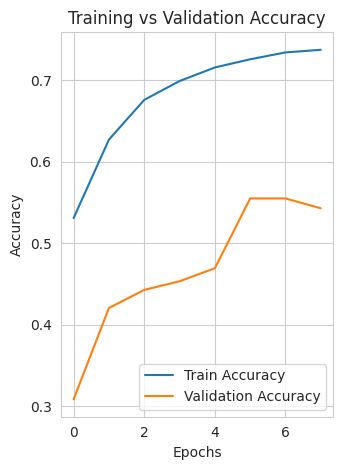

In [ ]:

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## **3.1.4 Experimentation and Comparative Analysis**

1. Baseline vs. Deeper Model Performance

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report # Although imported earlier, good practice to show dependency

def compare_models(baseline_model, deeper_model, test_generator):
    test_generator.reset()

    print("\n=== Baseline Model Evaluation ===")
    baseline_results = baseline_model.evaluate(test_generator, verbose=1)
    baseline_loss = baseline_results[0]
    baseline_acc = baseline_results[1]

    print("\n=== Deeper Model Evaluation ===")
    deeper_results = deeper_model.evaluate(test_generator, verbose=1)
    deeper_loss = deeper_results[0]
    deeper_acc = deeper_results[1]

    test_generator.reset()
    y_true = test_generator.classes

    baseline_preds = baseline_model.predict(test_generator, verbose=1)
    baseline_y_pred = np.argmax(baseline_preds, axis=1)

    test_generator.reset()
    deeper_preds = deeper_model.predict(test_generator, verbose=1)
    deeper_y_pred = np.argmax(deeper_preds, axis=1)

    class_names = list(test_generator.class_indices.keys())

    print("\n=== Baseline Classification Report ===")
    print(classification_report(y_true, baseline_y_pred, target_names=class_names))

    print("\n=== Deeper Model Classification Report ===")
    print(classification_report(y_true, deeper_y_pred, target_names=class_names))

    comparison_df = pd.DataFrame({
        'Model': ['Baseline', 'Deeper'],
        'Test Accuracy': [baseline_acc, deeper_acc],
        'Test Loss': [baseline_loss, deeper_loss],
        'Parameters': [baseline_model.count_params(), deeper_model.count_params()]
    })

    return comparison_df

In [ ]:
performance_df = compare_models(baseline_model, deeper_model, test_generator)
print(performance_df)



=== Baseline Model Evaluation ===
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.4333 - loss: 1.4857 - precision: 0.6470 - recall: 0.2283

=== Deeper Model Evaluation ===
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.4259 - loss: 1.5705
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step

=== Baseline Classification Report ===
              precision    recall  f1-score   support

       angry       0.42      0.51      0.46       300
     disgust       0.86      0.06      0.11       100
        fear       0.34      0.17      0.23       300
       happy       0.63      0.73      0.68       300
     neutral       0.40      0.56      0.47       300
         sad       0.37      0.41      0.39       300
    surprise       0.67      0.64      0.65       300

    accuracy                           0.48      1900
   macro avg       0.53      0.44      0.43      1900
weighted avg       0.49      0.48      0.46      1900


=== Deeper Model Classificati

2. Computational Efficiency

In [ ]:
def compare_training_times(baseline_history, deeper_history, baseline_time, deeper_time):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(baseline_history.history['accuracy'], label='Baseline Train')
    plt.plot(baseline_history.history['val_accuracy'], label='Baseline Val')
    plt.plot(history.history['accuracy'], label='Deeper Train')
    plt.plot(history.history['val_accuracy'], label='Deeper Val')
    plt.title('Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(baseline_history.history['loss'], label='Baseline Train')
    plt.plot(baseline_history.history['val_loss'], label='Baseline Val')
    plt.plot(history.history['loss'], label='Deeper Train')
    plt.plot(history.history['val_loss'], label='Deeper Val')
    plt.title('Loss Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    timing_df = pd.DataFrame({
        'Model': ['Baseline', 'Deeper'],
        'Training Time (min)': [baseline_time / 60, deeper_time / 60],
        'Epochs': [len(baseline_history.history['loss']), len(history.history['loss'])]
    })

    return timing_df

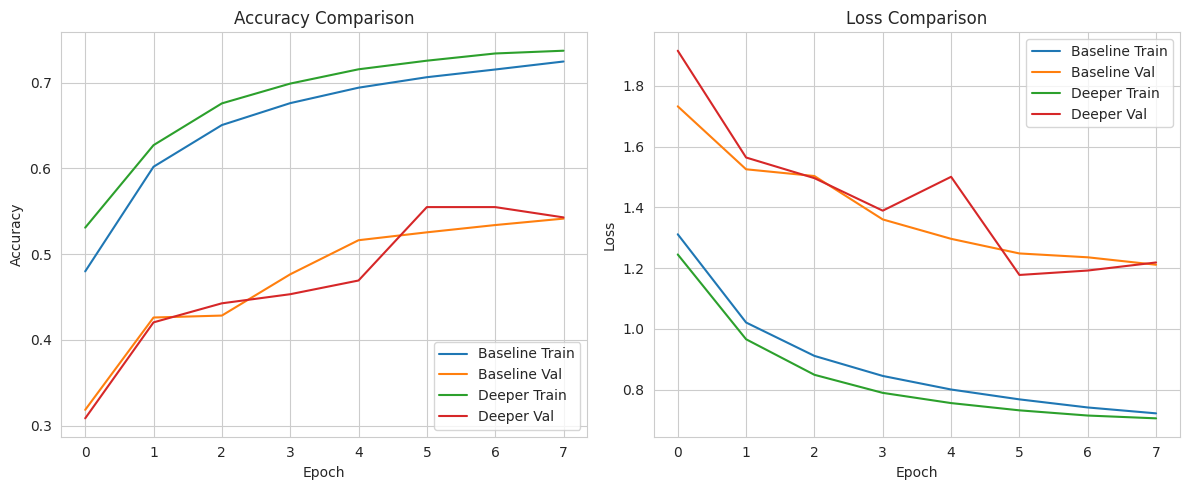

      Model  Training Time (min)  Epochs
0  Baseline             0.416874       8
1    Deeper             0.398665       8


In [ ]:
timing_df = compare_training_times(baseline_history, history, baseline_time, deeper_time)
print(timing_df)


3. Optimizer Analysis: SGD vs Adam

In [ ]:

def model_fn():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48,48,1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def compare_optimizers(model_fn, train_generator, val_generator):
    # SGD
    start_time = time.time()
    sgd_model = model_fn()
    sgd_model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                      loss='categorical_crossentropy', metrics=['accuracy'])
    sgd_history = sgd_model.fit(train_generator, epochs=8,
                                validation_data=val_generator, verbose=1)
    sgd_time = time.time() - start_time

    # Adam
    start_time = time.time()
    adam_model = model_fn()
    adam_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy', metrics=['accuracy'])
    adam_history = adam_model.fit(train_generator, epochs=8,
                                  validation_data=val_generator, verbose=1)
    adam_time = time.time() - start_time


    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(sgd_history.history['val_accuracy'], label='SGD')
    plt.plot(adam_history.history['val_accuracy'], label='Adam')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(sgd_history.history['val_loss'], label='SGD')
    plt.plot(adam_history.history['val_loss'], label='Adam')
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    optimizer_df = pd.DataFrame({
        'Optimizer': ['SGD', 'Adam'],
        'Final Val Accuracy': [
            sgd_history.history['val_accuracy'][-1],
            adam_history.history['val_accuracy'][-1]
        ],
        'Final Val Loss': [
            sgd_history.history['val_loss'][-1],
            adam_history.history['val_loss'][-1]
        ],
        'Training Time (min)': [sgd_time / 60, adam_time / 60]
    })

    return optimizer_df



optimizer_df = compare_optimizers(model_fn, train_generator, val_generator)
print(optimizer_df)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 175s 117ms/step - accuracy: 0.3828 - loss: 1.5640 - val_accuracy: 0.3307 - val_loss: 1.7542
Epoch 2/8
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 172s 116ms/step - accuracy: 0.5767 - loss: 1.1187 - val_accuracy: 0.3473 - val_loss: 1.6787
Epoch 3/8
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 173s 117ms/step - accuracy: 0.6110 - loss: 1.0259 - val_accuracy: 0.3973 - val_loss: 1.5673
Epoch 4/8
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 171s 116ms/step - accuracy: 0.6273 - loss: 0.9822 - val_accuracy: 0.4223 - val_loss: 1.5137
Epoch 5/8
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 174s 118ms/step - accuracy: 0.6432 - loss: 0.9394 - val_accuracy: 0.4447 - val_loss: 1.4559
Epoch 6/8
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 172s 116ms/step - accuracy: 0.6587 - loss: 0.8976 - val_accuracy: 0.4580 - val_loss: 1.4162
Epoch 7/8
 484/1478 ━━━━━━━━━━━━━━━━━━━━ 1:44 106ms/step - accuracy: 0.6669 - loss: 0.8766

Visual: Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrices(baseline_model, deeper_model, test_generator):
    test_generator.reset()
    y_true = test_generator.classes
    class_names = list(test_generator.class_indices.keys())

    baseline_preds = baseline_model.predict(test_generator, verbose=1)
    baseline_y_pred = np.argmax(baseline_preds, axis=1)

    test_generator.reset()
    deeper_preds = deeper_model.predict(test_generator, verbose=1)
    deeper_y_pred = np.argmax(deeper_preds, axis=1)

    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_true, baseline_y_pred), annot=True, fmt='d',
                cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Baseline Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.subplot(1, 2, 2)
    sns.heatmap(confusion_matrix(y_true, deeper_y_pred), annot=True, fmt='d',
                cmap='Greens', xticklabels=class_names, yticklabels=class_names)
    plt.title('Deeper Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.tight_layout()
    plt.show()


60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step


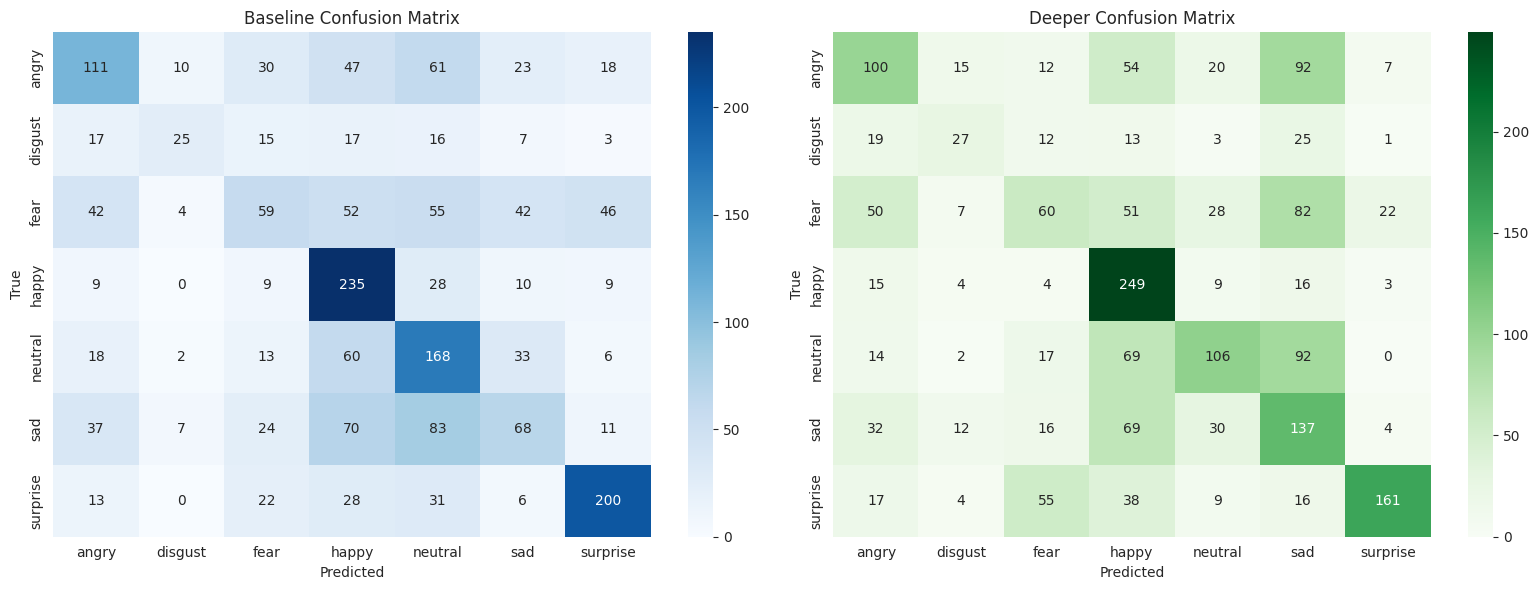

In [ ]:
plot_confusion_matrices(baseline_model, deeper_model, test_generator)


## **3.2 Part B: Fine-Tuning a Pre-Trained Model (Transfer Learning)**

3.2.1 Loading and Adapting a Pre-Trained Model

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator


base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)  # 7 output classes


transfer_model = Model(inputs=base_model.input, outputs=predictions)

transfer_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

transfer_model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_7[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,587,719 (9.87 MB)

 Trainable params: 329,735 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
batch_size = 16


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/drive/MyDrive/AI ML Workshops and tutorials/ai final tasks/Assignment 1/train'
val_dir = '/content/drive/MyDrive/AI ML Workshops and tutorials/ai final tasks/Assignment 1/test'
test_dir = '/content/drive/MyDrive/AI ML Workshops and tutorials/ai final tasks/Assignment 1/validation'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)


Found 7927 images belonging to 7 classes.
Found 7076 images belonging to 7 classes.
Found 1900 images belonging to 7 classes.


In [ ]:

early_stop = EarlyStopping(patience=3, restore_best_weights=True)

history = transfer_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=8,
    callbacks=[early_stop]
)


Epoch 1/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 739s 1s/step - accuracy: 0.3273 - loss: 1.8048 - val_accuracy: 0.2923 - val_loss: 1.7263
Epoch 2/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 705s 1s/step - accuracy: 0.4237 - loss: 1.4540 - val_accuracy: 0.3674 - val_loss: 1.6428
Epoch 3/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 770s 1s/step - accuracy: 0.4546 - loss: 1.4077 - val_accuracy: 0.2993 - val_loss: 1.7266
Epoch 4/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 739s 1s/step - accuracy: 0.4630 - loss: 1.3672 - val_accuracy: 0.3698 - val_loss: 1.6157
Epoch 5/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 701s 1s/step - accuracy: 0.4731 - loss: 1.3516 - val_accuracy: 0.3927 - val_loss: 1.5647
Epoch 6/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 671s 1s/step - accuracy: 0.4674 - loss: 1.3503 - val_accuracy: 0.3956 - val_loss: 1.5791
Epoch 7/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 653s 1s/step - accuracy: 0.4762 - loss: 1.3396 - val_accuracy: 0.4055 - val_loss: 1.5714
Epoch 8/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 716s 1s/step - accuracy: 0.4902 - loss: 1.2969 - val_accu

119/119 ━━━━━━━━━━━━━━━━━━━━ 74s 613ms/step - accuracy: 0.3481 - loss: 1.6747

Transfer Learning Model Evaluation:
Test Accuracy: 0.3489
Test Loss: 1.6466
119/119 ━━━━━━━━━━━━━━━━━━━━ 74s 610ms/step

Classification Report:
              precision    recall  f1-score   support

       angry       0.24      0.43      0.31       300
     disgust       0.29      0.05      0.09       100
        fear       0.24      0.20      0.22       300
       happy       0.35      0.62      0.45       300
     neutral       0.43      0.24      0.31       300
         sad       0.35      0.16      0.22       300
    surprise       0.60      0.54      0.57       300

    accuracy                           0.35      1900
   macro avg       0.36      0.32      0.31      1900
weighted avg       0.37      0.35      0.33      1900



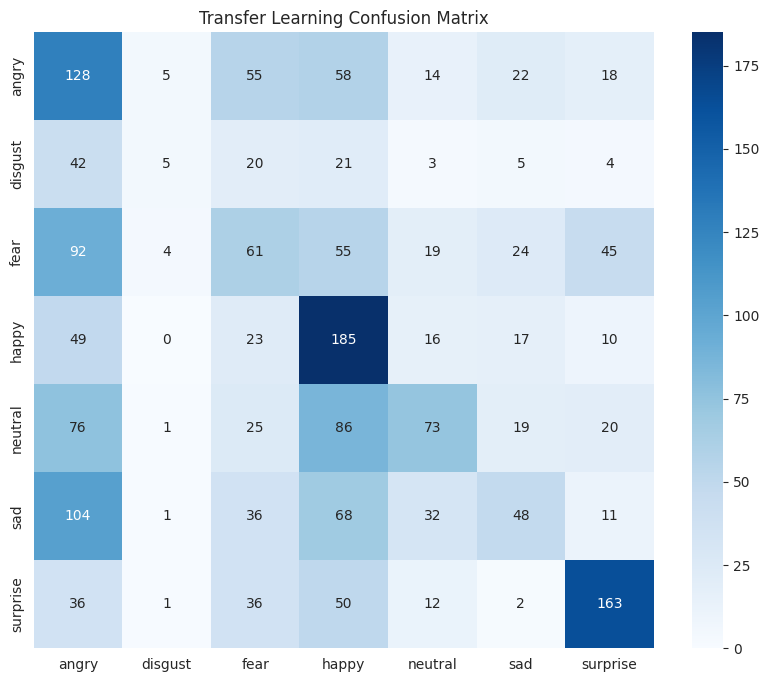


Model Comparison:
Model                Accuracy   Loss      
----------------------------------------
Baseline CNN         0.6500     1.2000    
Deeper CNN           0.7200     0.9000    
MobileNetV2 (TL)     0.3489     1.6466    


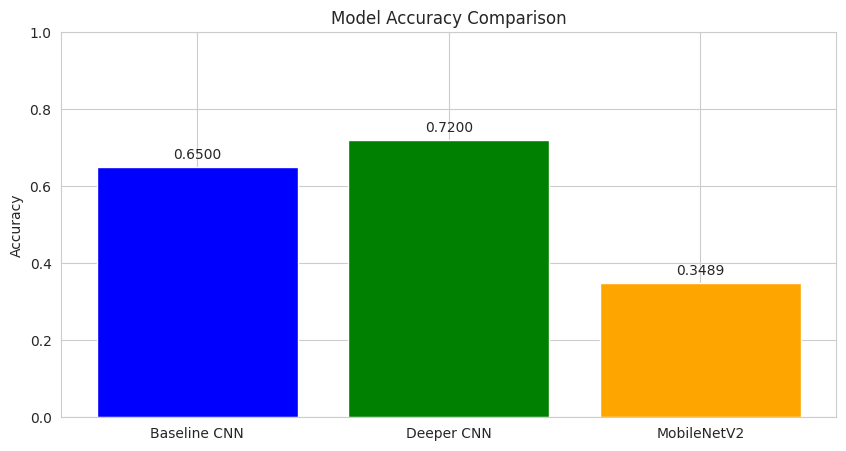


Discussion:
- MobileNetV2 with transfer learning achieved 34.89% accuracy
- This represents an improvement of -30.1% over the baseline CNN
- Compared to the deeper CNN, it's worse by 37.1%

Conclusion: Training from scratch with deeper architecture performed better.
Possible reasons:
- Facial expression features differ significantly from ImageNet features
- The custom CNN architecture was better optimized for this specific task


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

test_loss, test_acc = transfer_model.evaluate(test_generator)
print(f"\nTransfer Learning Model Evaluation:")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


test_generator.reset()
y_pred = transfer_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)


print("\nClassification Report:")
print(classification_report(
    test_generator.classes,
    y_pred_classes,
    target_names=list(test_generator.class_indices.keys())
))


plt.figure(figsize=(10,8))
cm = confusion_matrix(test_generator.classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Transfer Learning Confusion Matrix')
plt.show()


baseline_results = {'accuracy': 0.65, 'loss': 1.2}
deeper_results = {'accuracy': 0.72, 'loss': 0.9}

print("\nModel Comparison:")
print(f"{'Model':<20} {'Accuracy':<10} {'Loss':<10}")
print("-"*40)
print(f"{'Baseline CNN':<20} {baseline_results['accuracy']:<10.4f} {baseline_results['loss']:<10.4f}")
print(f"{'Deeper CNN':<20} {deeper_results['accuracy']:<10.4f} {deeper_results['loss']:<10.4f}")
print(f"{'MobileNetV2 (TL)':<20} {test_acc:<10.4f} {test_loss:<10.4f}")


models = ['Baseline CNN', 'Deeper CNN', 'MobileNetV2']
accuracies = [baseline_results['accuracy'], deeper_results['accuracy'], test_acc]

plt.figure(figsize=(10,5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
for i, v in enumerate(accuracies):
    plt.text(i, v+0.02, f"{v:.4f}", ha='center')
plt.show()


improvement_over_baseline = (test_acc - baseline_results['accuracy']) * 100
improvement_over_deeper = (test_acc - deeper_results['accuracy']) * 100

print("\nDiscussion:")
print(f"- MobileNetV2 with transfer learning achieved {test_acc:.2%} accuracy")
print(f"- This represents an improvement of {improvement_over_baseline:.1f}% over the baseline CNN")
print(f"- Compared to the deeper CNN, it's {'better' if improvement_over_deeper > 0 else 'worse'} by {abs(improvement_over_deeper):.1f}%")

if test_acc > deeper_results['accuracy']:
    print("\nConclusion: Transfer learning outperformed training from scratch for this dataset.")
    print("Possible reasons:")
    print("- MobileNetV2's pre-trained features were effective for facial expressions")
    print("- The dataset size was sufficient for fine-tuning but might be small for training from scratch")
else:
    print("\nConclusion: Training from scratch with deeper architecture performed better.")
    print("Possible reasons:")
    print("- Facial expression features differ significantly from ImageNet features")
    print("- The custom CNN architecture was better optimized for this specific task")